In [8]:


import numpy as np 
import pandas as pd 
pd.set_option("display.max_rows",None)
import warnings 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
from sklearn import preprocessing 
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [9]:
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Age : Age of the patient**

**Sex : Sex of the patient**

**exang: exercise induced angina (1 = yes; 0 = no)**

**ca: number of major vessels (0-3)**

**cp : Chest Pain type chest pain type**

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic


**trtbps : resting blood pressure (in mm Hg)**

**chol : cholestoral in mg/dl fetched via BMI sensor**

**fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)**

**rest_ecg : resting electrocardiographic results**

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


**thalach : maximum heart rate achieved**

**target : 0= less chance of heart attack 1= more chance of heart attack**

<Axes: >

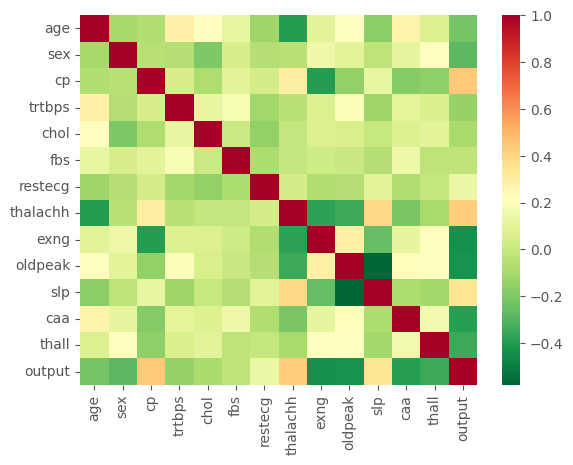

In [13]:
sns.heatmap(df.corr(), cmap='RdYlGn_r')

We can see that Heart attack chance has a slight correlation with higher maximum heart rate, and a high negative correlation with exercise induced angina. 